In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [27]:
dataset = pd.read_csv("https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv")

# **Take look into our dataset**

In [4]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# **checking for null values in the dataset**

In [6]:
dataset.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

*As there is no null values we can continue with outliers detection*

# **Checking and removing outliers**



In [7]:
dataset.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## **outliers in visualization**

**A function for box plot**

In [28]:
def box_plot(df):
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]
  fig, axes = plt.subplots((len(dfint.columns)//3) +1, 3,figsize=(20, 15))
  r,c,count = 0,0,0
  for i in dfint.columns:
    # print(i,(len(dfint.columns)//3))
    sns.boxplot(y=dfint[i],color="black", ax=axes[r,c])
    if c == 2:
      c, r = -1, r+1
    if count == len(dfint.columns)-1:
      print(i,"end")
      fig.delaxes(axes.flatten()[count+1])
    c+=1
    count+=1

<ipython-input-28-82de10e658b2>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]


Yearly Amount Spent end


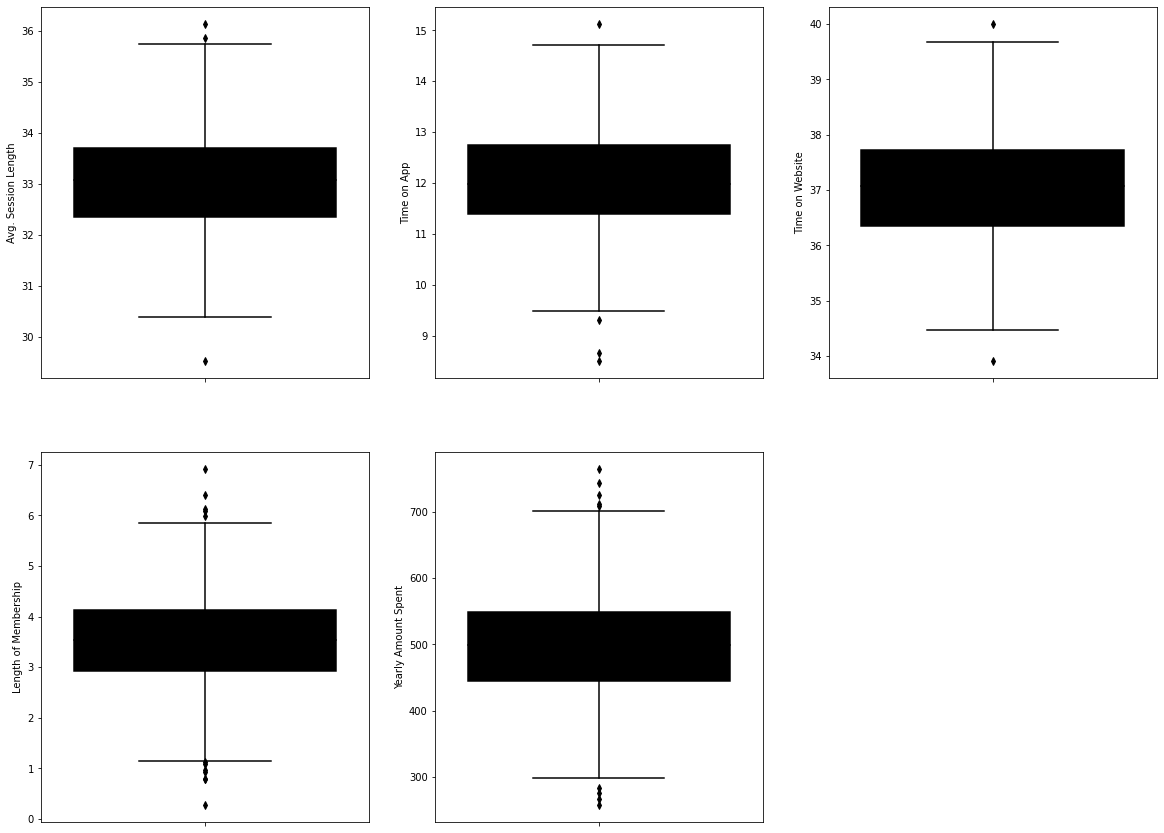

In [29]:
box_plot(dataset)

There are too many outliers so we have to remove then 

**A function for outliers**

In [39]:
def outliers_detector(data,features):
    outliers = []
    for i in features:
      Q1 = data[i].quantile(0.25)
      Q2 = data[i].quantile(0.5)
      Q3 = data[i].quantile(0.75)
      iqr = Q3 - Q1
      mini = Q1 - 1.5 * iqr
      maxi = Q3 + 1.5 * iqr
      print(f"{i} -> mini -> {mini}, maxi -> {maxi}, Q1 -> {Q1}, medain -> {Q2}, Q3 -> {Q3}, irq -> {iqr} \n")
      outliers.extend(list(data[i].index[(data[i] > maxi) | (data[i] < mini)]))
    return outliers

ind = outliers_detector(dataset.iloc[:,3:],list(dataset.columns)[3:])
print("Total_outliers_indexes in DataFrame",ind)


Avg. Session Length -> mini -> 30.28657747536273, maxi -> 35.767229553109516, Q1 -> 32.34182200451777, medain -> 33.08200760262899, Q3 -> 33.71198502395447, irq -> 1.3701630194366956 

Time on App -> mini -> 9.3396088251313, maxi -> 14.802394229583683, Q1 -> 11.388153351800943, medain -> 11.983231258825267, Q3 -> 12.753849702914039, irq -> 1.3656963511130957 

Time on Website -> mini -> 34.29849491039147, maxi -> 39.76719469493466, Q1 -> 36.34925732959517, medain -> 37.069366582835826, Q3 -> 37.716432275730966, irq -> 1.3671749461357976 

Length of Membership -> mini -> 1.136371357955959, maxi -> 5.920580296370714, Q1 -> 2.930449709861492, medain -> 3.5339750035877096, Q3 -> 4.126501944465181, irq -> 1.1960522346036888 

Yearly Amount Spent -> mini -> 288.62495124023667, maxi -> 705.7271533863172, Q1 -> 445.03827704501686, medain -> 498.887875469115, Q3 -> 549.313827581537, irq -> 104.27555053652014 

Total_outliers_indexes in DataFrame [12, 154, 390, 65, 309, 362, 442, 69, 157, 50, 15

**function to remove outliers**

In [11]:
def outliers_remover(data,outliers):
  data.drop(set(outliers),inplace=True)
  return data
df = outliers_remover(dataset,ind)
print(len(df))

476


After removeing outliers

Yearly Amount Spent end


<ipython-input-8-82de10e658b2>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]


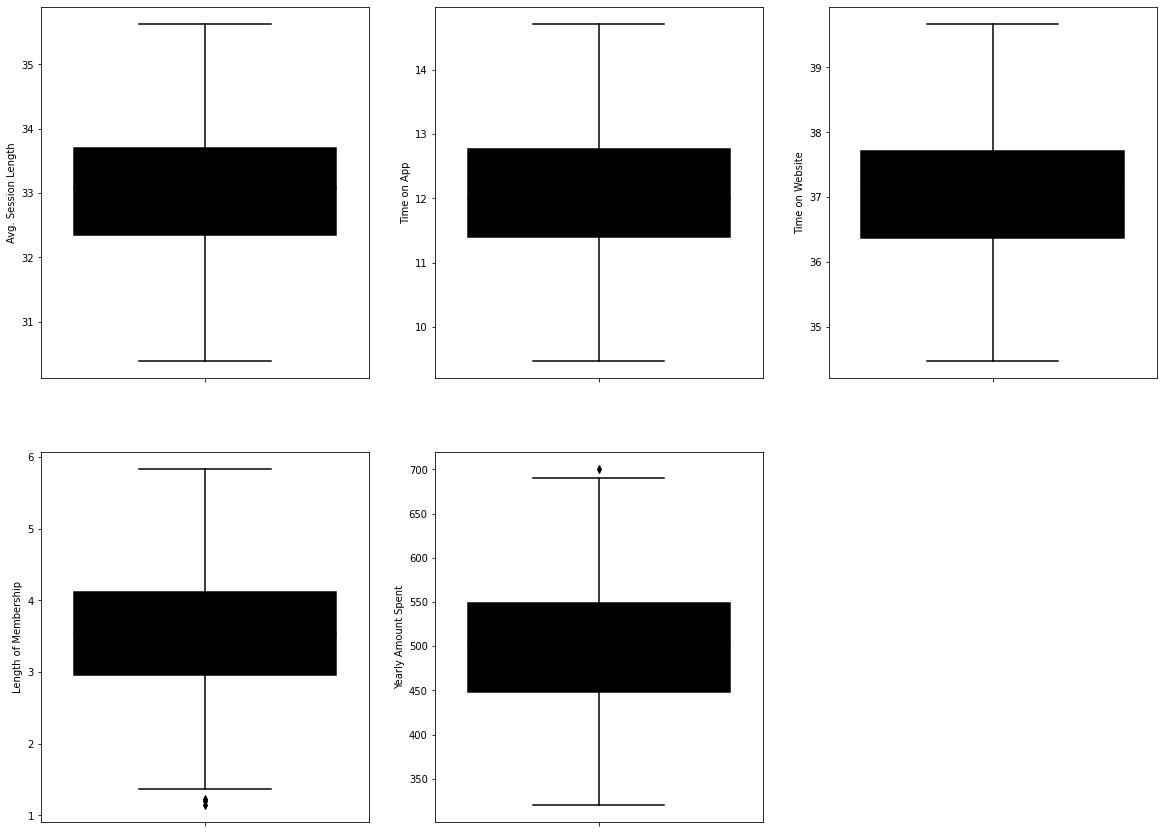

In [12]:
box_plot(df)

In [13]:
ind = outliers_detector(df.iloc[:,3:],list(df.columns)[3:])
print(ind,len(df))
dataset = outliers_remover(dataset,ind)
print(len(dataset))

mini,30.303772420236818,maxi,35.7385713116527,Q1,32.34182200451777,medain,33.07713320079979,Q3,33.70052172737174,irq,1.3586997228539701,Avg. Session Length
mini,9.343339141945862,maxi,14.820702766577782,Q1,11.397350501182832,medain,11.995166947195546,Q3,12.766691407340812,irq,1.36934090615798,Time on App
mini,34.33833717325757,maxi,39.743289337215,Q1,36.36519423474161,medain,37.07558311153922,Q3,37.716432275730966,irq,1.351238040989358,Time on Website
mini,1.2375065695931933,maxi,5.84693873748812,Q1,2.9660436325537907,medain,3.5354454477463864,Q3,4.118401674527522,irq,1.1523580419737316,Length of Membership
mini,298.27213143575204,maxi,698.3805170868752,Q1,448.31277605492323,medain,501.1113683678547,Q3,548.339872467704,irq,100.02709641278079,Yearly Amount Spent
[214, 320, 487, 24] 476
472


Yearly Amount Spent end


<ipython-input-8-82de10e658b2>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]


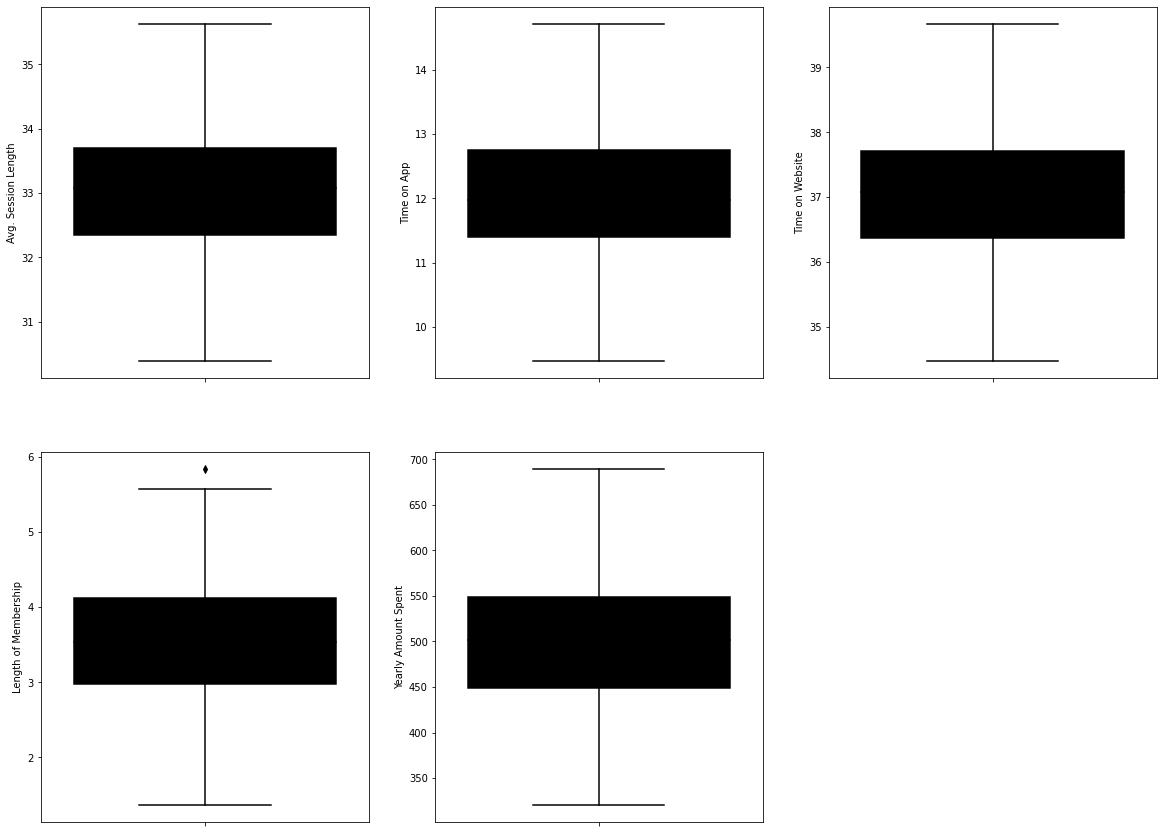

In [14]:
box_plot(dataset)

now we are free from the that outliers

#**checking correlation of datset**

---



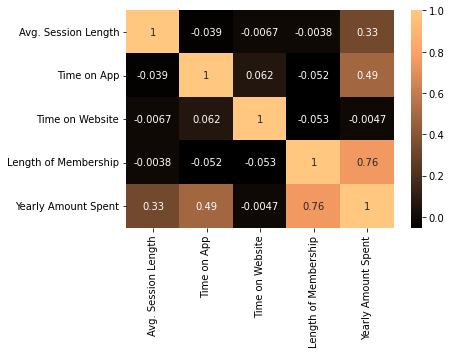

In [15]:
sns.heatmap(dataset.corr(),annot=True,cmap="copper")

# **function for dist plot**

In [16]:
def dist_plot(df):
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]
  fig, axes = plt.subplots((len(dfint.columns)//3) +1, 3,figsize=(20, 15))
  r,c, count = 0,0,0
  for i in dfint.columns:
    # print(i,(len(dfint.columns)//3))
    sns.distplot(dfint[i],color="black", ax=axes[r,c])
    if c == 2:
      c, r = -1, r+1
    if count == len(dfint.columns)-1:
      print(i,"end")
      fig.delaxes(axes.flatten()[count+1])
    c+=1
    count+=1

<ipython-input-16-fe4c200b8e4d>:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  dfint = df[df.columns[df.dtypes == "int64"] | df.columns[df.dtypes == "float64"]]
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr

Yearly Amount Spent end


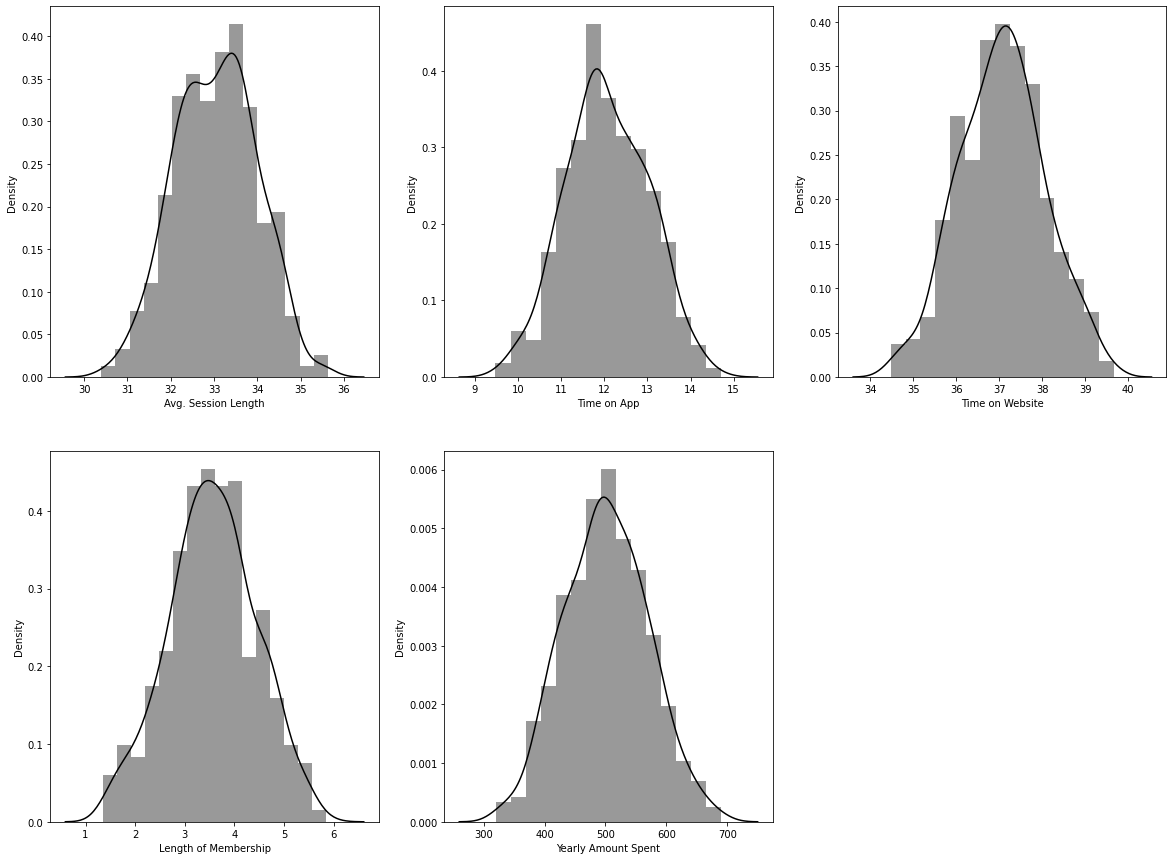

In [17]:
dist_plot(dataset)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

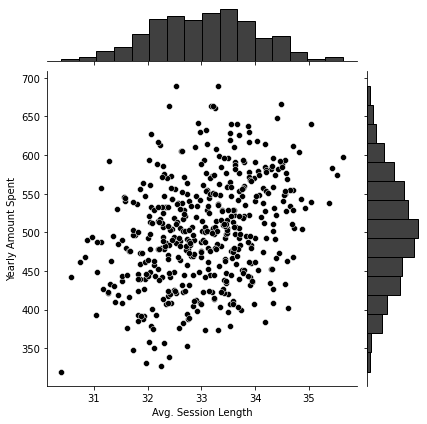

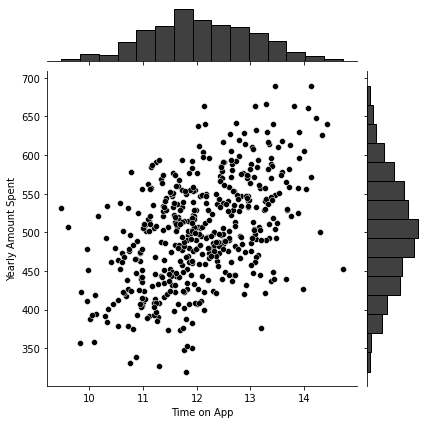

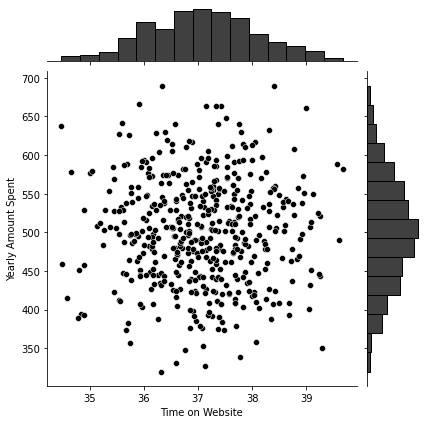

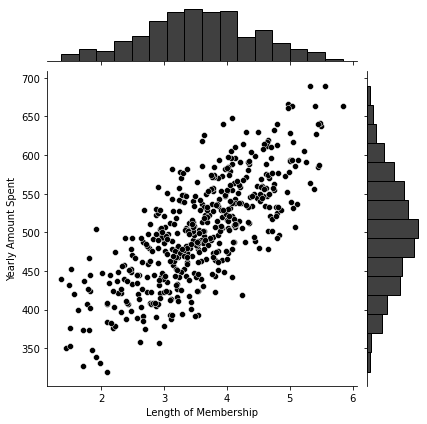

In [18]:
for i in df.columns[3:-1]:
  sns.jointplot(df[i],df.iloc[:,-1],color="black")

In [19]:
dataset["more_or_less"] = dataset["Yearly Amount Spent"].apply(lambda x: "greater" if x>500 else("lesser"))

**make a pair plot to get more details regrading the dataset**

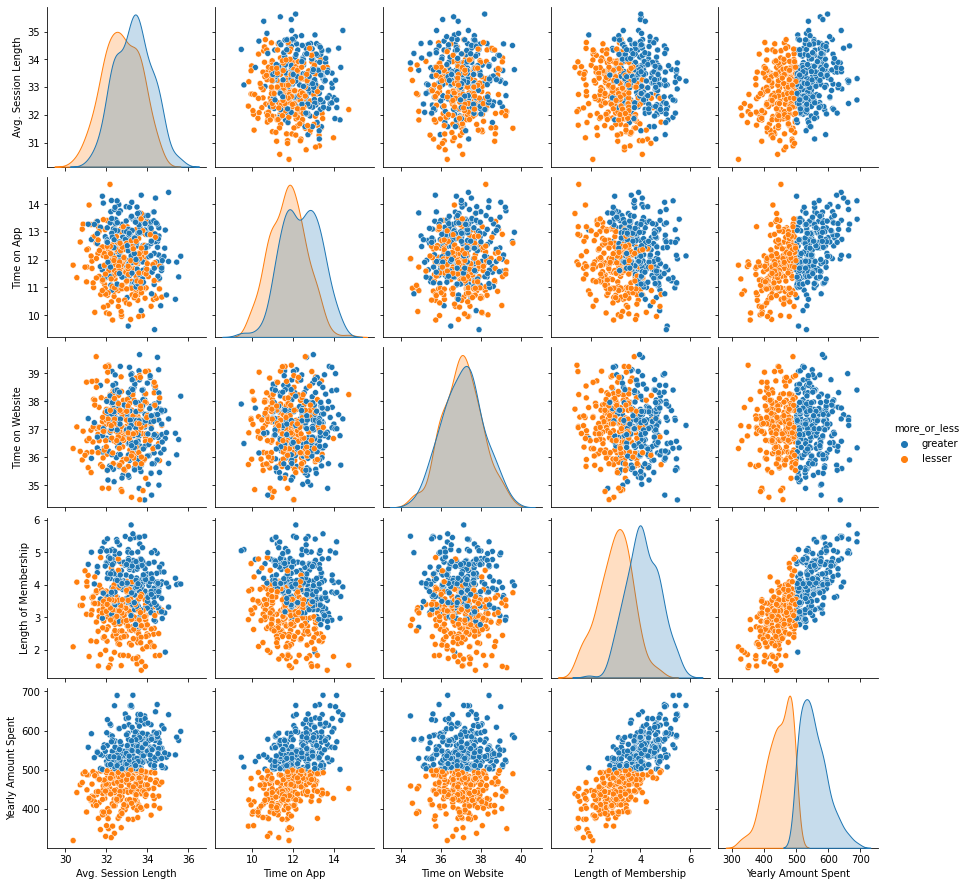

In [20]:
sns.pairplot(dataset,hue="more_or_less")

In [21]:
dataset.drop("more_or_less",axis=1,inplace=True)